In a nutshell, a signal goes through a pre-emphasis filter; then gets sliced into (overlapping) frames 
and a window function is applied to each frame; afterwards, we do a Fourier transform on 
each frame (or more specifically a Short-Time Fourier Transform) and calculate the power spectrum;
and subsequently compute the filter banks. To obtain MFCCs, a Discrete Cosine Transform (DCT) is applied
to the filter banks retaining a number of the resulting coefficients while the rest are discarded.
A final step in both cases, is mean normalization.

for more details visit:


http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

https://tspace.library.utoronto.ca/bitstream/1807/44123/1/Mohamed_Abdel-rahman_201406_PhD_thesis.pdf

In [1]:
%matplotlib inline
import sys
sys.path.append('../tools')
from wavprepro import *
%load_ext autoreload
%autoreload 2

../tools\wavprepro.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\home\appdata\local\programs\python\python35\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\home\appdata\local\programs\python\python35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\home\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\home\appdata\local\programs\python\python35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\home\appdata\local\programs\python\python35\lib\site-packa

In [2]:
mel, mag = get_spectrograms("F:/persian speech data/Data/wavs/ip10_102.wav")

In [3]:
mel.shape

(516, 80)

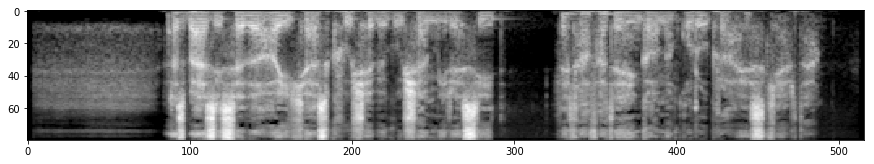

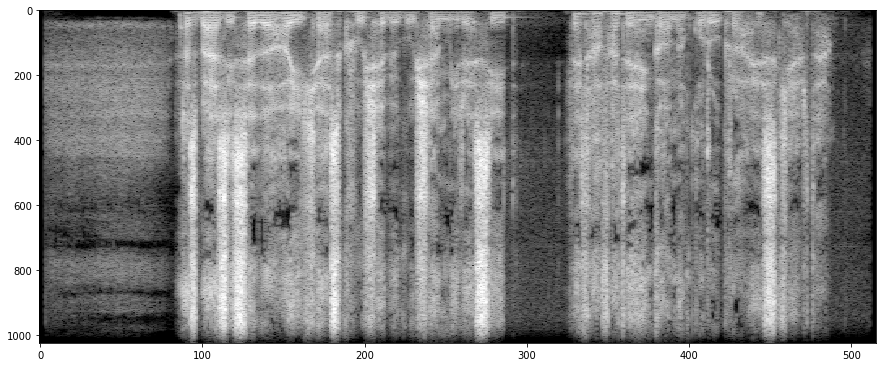

In [4]:
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(mel.T,cmap='gray',aspect=1)
plt.show()
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(mag.T,cmap='gray',aspect=0.2)
plt.show()

In [5]:
fname, mel, mag= load_spectrograms("F:/persian speech data/Data/wavs/ip10_10.wav")
mel.shape

(314, 80)

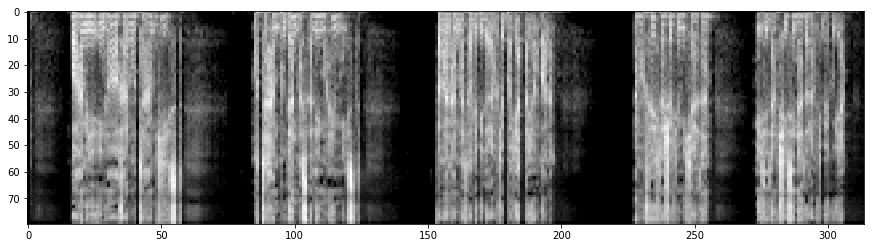

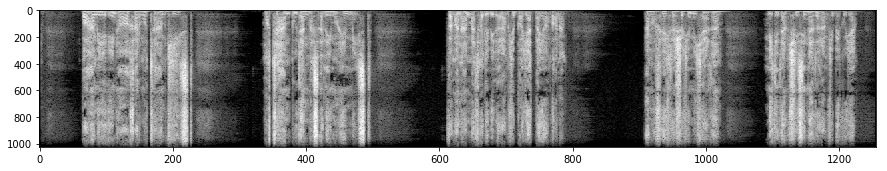

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(mel.T,cmap='gray',aspect=1)
plt.show()
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(mag.T,cmap='gray',aspect=0.2)
plt.show()

In [7]:
#input to the audio encoder
print(mel.shape)
mel=tf.expand_dims(mel,axis=0)

(314, 80)


In [8]:
#szero pad , but hell it doesnt make any sense 
S = tf.concat((tf.zeros_like(mel[:, :1, :]), mel[:, :-1, :]), 1)
S

<tf.Tensor 'concat:0' shape=(1, 314, 80) dtype=float32>

# IGNORE THIS PART {START}

https://github.com/keras-team/keras/issues/8751

In [8]:
 # pre-padding for causality
size=3
rate=3
pad_len = (size - 1) * rate  # padding size
#6
inputs = tf.pad(S, [[0, 0], [pad_len, 0], [0, 0]])
inputs


<tf.Tensor 'Pad:0' shape=(1, 320, 80) dtype=float32>

In [9]:
sys.path.append('../network')
from audio_encoder import conv1d
y=conv1d(input_tensor=S,filters=512,
                            kernel_size=3,strides=1,padding='causal', 
                            dilation_rate=3,activation=None,dropout_rate=0.1,scope_name="sdf" )

In [10]:
y

<tf.Tensor 'sdf/dropout/Identity:0' shape=(1, 314, 512) dtype=float32>

In [11]:
pad_len = (3 - 1) * 3 
input_tensor = tf.pad(S, [[0, 0], [pad_len, 0], [0, 0]])
padding = "valid"
u=tf.layers.conv1d(inputs=input_tensor,filters=512,
                            kernel_size=3,strides=1,padding=padding, 
                            dilation_rate=3,activation=None,
                            kernel_initializer=tf.constant_initializer())

In [12]:
u

<tf.Tensor 'conv1d/BiasAdd:0' shape=(1, 314, 512) dtype=float32>

# how causal convolution works
for more details visit :

https://arxiv.org/pdf/1609.03499.pdf

section 2.1

In [1]:
import sys
import tensorflow as tf
#sys.path.append('../network')
#from audio_encoder import conv1d
inp=tf.get_variable("test_con",shape=[1, 8, 8],initializer=tf.constant_initializer(value=2))
init = tf.constant_initializer(value=4)
pad_len = (3 - 1) * 3 
input_tensor = tf.pad(inp, [[0, 0], [pad_len, 0], [0, 0]])
padding = "valid"
u=tf.layers.conv1d(inputs=input_tensor,filters=1,
                            kernel_size=3,strides=1,padding=padding, 
                            dilation_rate=3,activation=None,
                            kernel_initializer=init)
u

<tf.Tensor 'conv1d/BiasAdd:0' shape=(1, 8, 1) dtype=float32>

In [2]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(inp)

array([[[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]]], dtype=float32)

In [3]:
 # pre-padding for causality
size=3
rate=3
pad_len = (size - 1) * rate  # padding size
#6
inp = tf.pad(inp, [[0, 0], [pad_len, 0], [0, 0]])
inp

<tf.Tensor 'Pad_1:0' shape=(1, 14, 8) dtype=float32>

In [4]:
i1=sess.run(inp)
sess.run(inp)

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]]], dtype=float32)

In [5]:
sess.run(u)

array([[[  64.],
        [  64.],
        [  64.],
        [ 128.],
        [ 128.],
        [ 128.],
        [ 192.],
        [ 192.]]], dtype=float32)

In [6]:
u.shape

TensorShape([Dimension(1), Dimension(8), Dimension(1)])

In [7]:
sess = tf.Session()
op = sess.graph.get_operations()
#get kernel values
ker=[m.values() for m in op][6]
ker


(<tf.Tensor 'conv1d/kernel/Initializer/Const:0' shape=(3, 8, 1) dtype=float32>,)

In [8]:
sess.run(ker)

(array([[[ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.]],
 
        [[ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.]],
 
        [[ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.],
         [ 4.]]], dtype=float32),)

In [43]:
i=0

In [107]:

i=i+1
inp=tf.get_variable("fghg"+str(i),shape=[1, 8, 8],initializer=tf.constant_initializer(value=2))
init = tf.constant_initializer(value=4)
print(inp)
dilation_rate=3
pad_len = (3 - 1) * dilation_rate 
input_tensor = tf.pad(inp, [[0, 0], [pad_len, 0], [0, 0]])
print(input_tensor)
padding = "valid"
u=tf.layers.conv1d(inputs=input_tensor,filters=8,
                            kernel_size=3,strides=1,padding=padding, 
                            dilation_rate=dilation_rate,activation=None,
                            kernel_initializer=init)
u

<tf.Variable 'fghg49:0' shape=(1, 8, 8) dtype=float32_ref>
Tensor("Pad_58:0", shape=(1, 14, 8), dtype=float32)


<tf.Tensor 'conv1d_33/BiasAdd:0' shape=(1, 8, 8) dtype=float32>

In [108]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(u)

array([[[  64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.],
        [  64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.],
        [  64.,   64.,   64.,   64.,   64.,   64.,   64.,   64.],
        [ 128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.],
        [ 128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.],
        [ 128.,  128.,  128.,  128.,  128.,  128.,  128.,  128.],
        [ 192.,  192.,  192.,  192.,  192.,  192.,  192.,  192.],
        [ 192.,  192.,  192.,  192.,  192.,  192.,  192.,  192.]]], dtype=float32)

In [109]:
sess.run(input_tensor)

array([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]]], dtype=float32)

hwe use casual "adding zeros in the begening og the model" because we dont wanna look at the future data

# IGNORE THIS PART {END}

In [9]:
S

<tf.Tensor 'concat:0' shape=(1, 314, 80) dtype=float32>

In [10]:
sys.path.append('../network')
from audio_encoder import audioencoder

In [11]:
Q=audioencoder(input_tensor=S,dropout_rate=hp.dropout_rate,num_hidden_layers=hp.d)

In [12]:
Q

<tf.Tensor 'audioencoder_highwaynet_Layer21/dropout/Identity:0' shape=(1, 314, 256) dtype=float32>